# Step 5: Feature Engineering for NYC 311 Modeling

This notebook demonstrates the complete feature engineering pipeline for three modeling tracks:
1. **Forecast** - Time-series forecasting of ticket arrivals
2. **Triage** - Ticket prioritization at creation time
3. **Duration** - Survival modeling for time-to-close

All features are **leakage-safe** and use **H3-based spatial grouping**.


why LBM?


In [1]:
import os
import sys

PACKAGE_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, PACKAGE_PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

from src import preprocessing
from src import features
from src import config
from src import forecast

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
from importlib import reload

c:\Users\gorav\GitHub\nyc-311-service-requests\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Usage Instructions

This notebook uses the feature engineering module from `src/features.py`.

To run this notebook:
1. Ensure you have data in `data/landing/311-service-requests/`
2. Run `pip install -r requirements.txt` to install dependencies
3. Execute cells sequentially

For detailed documentation, see `src/FEATURE_ENGINEERING_README.md`


## Load Data

In [ ]:
forecast_panel = pd.read_parquet(config.PRESENTATION_DATA_PATH + '/model_fitting_data.parquet')


## Fit Modesl

In [3]:
numerical_columns = [
            'lag1', 'lag4', 'roll4', 'roll12',
            'momentum', 'weeks_since_last',
            'tavg', 'prcp', 'heating_degree', 'cooling_degree',
            'rain_3d', 'rain_7d', 'log_pop', 'nbr_roll4', 'nbr_roll12'
        ]

categorical_columns = ['week_of_year', 'month',  'heat_flag', 'freeze_flag', 'hex6', 'complaint_family']
horizons = [1]

### Fit Mean Models

In [4]:
bundle_mean = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    'mean'
)

Training model for horizon 1
X shape pre-filtering: (442520, 28)
X shape post-filtering: (425330, 28)
Train dates [2010-03-16 00:00:00 to 2024-12-31 00:00:00], Test dates [2025-01-07 00:00:00 to 2025-07-29 00:00:00]
X training shape: (412733, 28)
X test shape: (12597, 28)
CV (neg_mean_absolute_error) scores: [-0.60000682 -0.61859085 -0.6121084  -0.64203098 -0.67433392 -0.71200323
 -0.70442157 -0.6859381  -0.71956593 -0.51387621 -0.58668656 -0.62126658
 -0.59932498 -0.6569982 ]
CV mean: -0.6390823083165394
train metrics
  h=1: RMSE=1.012, MAE=0.637, Poisson Dev=1.032
test metrics
  h=1: RMSE=1.102, MAE=0.620, Poisson Dev=1.029



### Fit 90th Percentile Models

In [5]:
bundle_90 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '90'
)

Training model for horizon 1
X shape pre-filtering: (442520, 28)
X shape post-filtering: (425330, 28)
Train dates [2010-03-16 00:00:00 to 2024-12-31 00:00:00], Test dates [2025-01-07 00:00:00 to 2025-07-29 00:00:00]
X training shape: (412733, 28)
X test shape: (12597, 28)
CV (neg_mean_absolute_error) scores: [-1.05937553 -1.14376031 -1.1671791  -1.19028247 -1.23104339 -1.29754105
 -1.31626278 -1.32296199 -1.34886305 -1.07001157 -1.08721758 -1.18306039
 -1.1671428  -1.2022219 ]
CV mean: -1.1990659953599614
train metrics
  h=1: RMSE=1.654, MAE=1.261, Poisson Dev=1.989
test metrics
  h=1: RMSE=1.741, MAE=1.225, Poisson Dev=1.960



### Fit 50th Percentile Models

In [6]:
bundle_50 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '50'
)

Training model for horizon 1
X shape pre-filtering: (442520, 28)
X shape post-filtering: (425330, 28)
Train dates [2010-03-16 00:00:00 to 2024-12-31 00:00:00], Test dates [2025-01-07 00:00:00 to 2025-07-29 00:00:00]
X training shape: (412733, 28)
X test shape: (12597, 28)
CV (neg_mean_absolute_error) scores: [-0.50924047 -0.53680125 -0.52489648 -0.5587594  -0.59567866 -0.64244884
 -0.62962473 -0.60529976 -0.64451875 -0.39434433 -0.49581252 -0.517043
 -0.50822298 -0.56991552]
CV mean: -0.552329049888772
train metrics
  h=1: RMSE=1.111, MAE=0.552, Poisson Dev=8.106
test metrics
  h=1: RMSE=1.137, MAE=0.524, Poisson Dev=7.846



### Fit 10th Percentile Models

In [7]:
bundle_10 = forecast.train_models(
    forecast_panel,
    numerical_columns,
    categorical_columns,
    horizons,
    '10'
)

Training model for horizon 1
X shape pre-filtering: (442520, 28)
X shape post-filtering: (425330, 28)
Train dates [2010-03-16 00:00:00 to 2024-12-31 00:00:00], Test dates [2025-01-07 00:00:00 to 2025-07-29 00:00:00]
X training shape: (412733, 28)
X test shape: (12597, 28)
CV (neg_mean_absolute_error) scores: [-0.58686403 -0.63565847 -0.60922392 -0.66438048 -0.73047962 -0.79211972
 -0.77481826 -0.73778447 -0.80918527 -0.42300856 -0.59105152 -0.61585126
 -0.6277236  -0.71207031]
CV mean: -0.66501567844065
train metrics
  h=1: RMSE=1.463, MAE=0.681, Poisson Dev=23.611
test metrics
  h=1: RMSE=1.555, MAE=0.641, Poisson Dev=20.576



### Save All Bundles

In [8]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
forecast.save_bundle(bundle_mean,  timestamp, 'lgb_mean.pkl')
forecast.save_bundle(bundle_90,  timestamp, 'lgb_90.pkl')
forecast.save_bundle(bundle_50,  timestamp, 'lgb_50.pkl')
forecast.save_bundle(bundle_10,  timestamp, 'lgb_10.pkl')

Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251005_192302\just_model\lgb_mean.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251005_192302\just_model\lgb_90.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251005_192302\just_model\lgb_50.pkl
Model bundle saved to: c:\Users\gorav\GitHub\nyc-311-service-requests\models\20251005_192302\just_model\lgb_10.pkl


## Evaluate Models

### Evaluate Mean Models

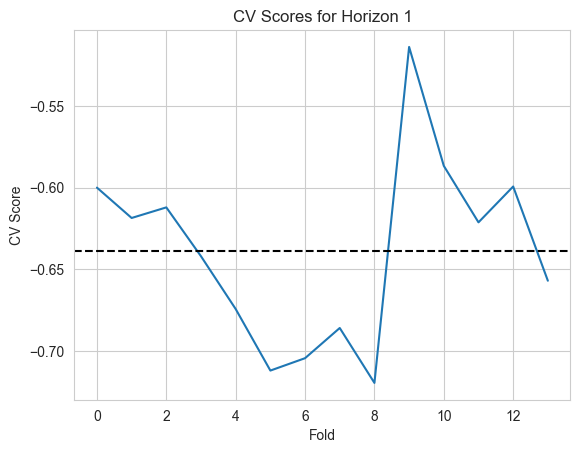

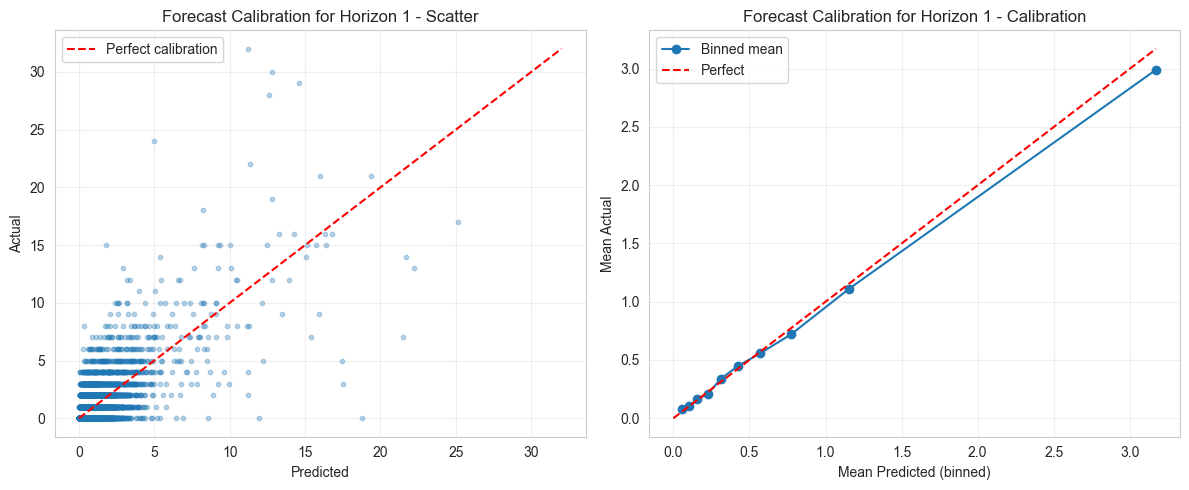

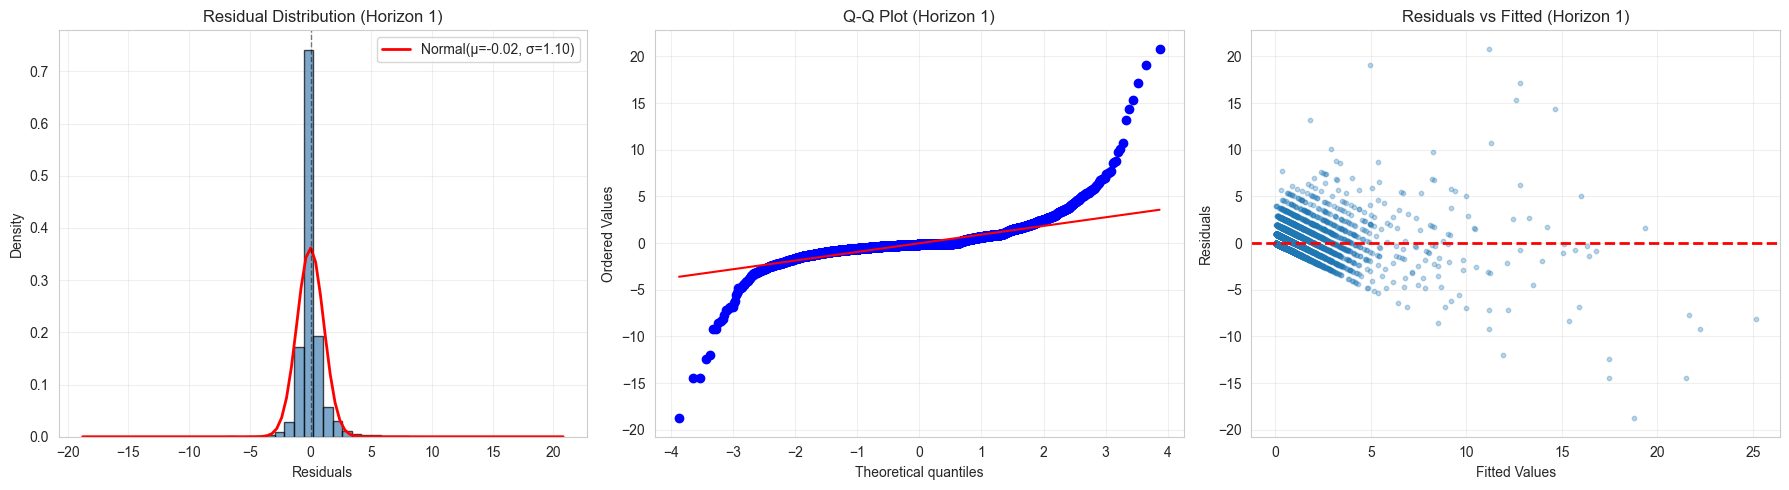


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: -0.0232
  Std Dev: 1.1016
  Median: -0.1523
  Skewness: 1.7801
  Kurtosis: 51.8169

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.6954
  P-value: 8.4507e-70
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 844.3246
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.0123741432603053, 'mae': 0.6374941135473998, 'poisson_deviance': 1.031509688504319, 'n_samples': 412733}, 'test': {'horizon': 1, 'rmse': 1.1018345571733479, 'mae': 0.6202293260992495, 'poisson_deviance': 1.0290721880565503, 'n_samples': 12597}}



In [9]:
reload(forecast)
forecast.evaluate_models(bundle_mean)

### Evaluate 90th Percentile Models

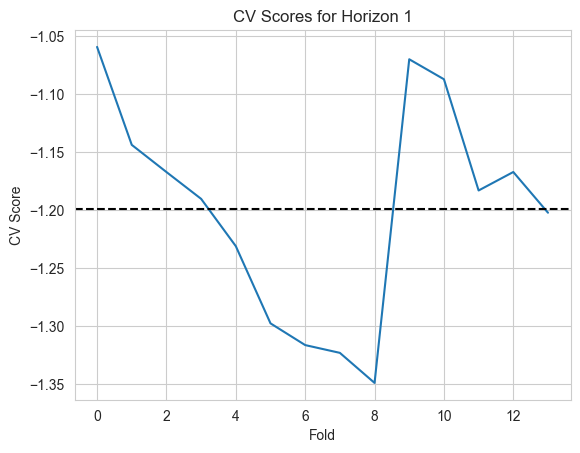

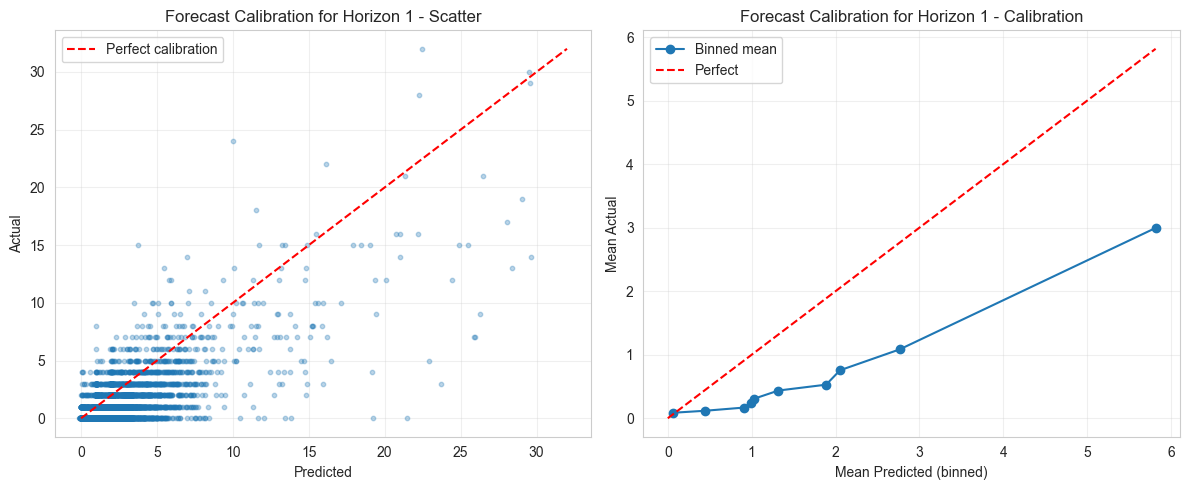

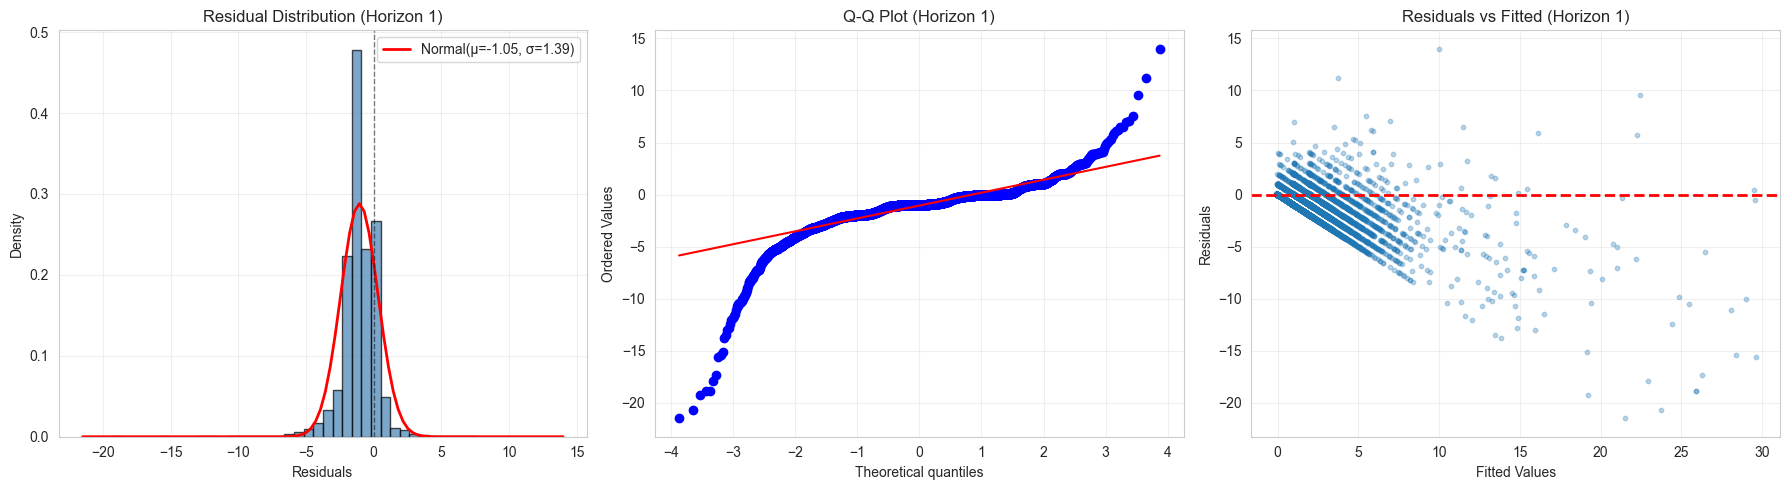


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: -1.0544
  Std Dev: 1.3857
  Median: -0.9889
  Skewness: -2.4723
  Kurtosis: 29.2045

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.7654
  P-value: 1.2178e-64
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 450.0847
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.6539649919859463, 'mae': 1.2612123440554233, 'poisson_deviance': 1.9894346503453773, 'n_samples': 412733}, 'test': {'horizon': 1, 'rmse': 1.7411969751219925, 'mae': 1.2254104899528666, 'poisson_deviance': 1.9600781615935954, 'n_samples': 12597}}



In [10]:
reload(forecast)
forecast.evaluate_models(bundle_90)

### Evaluate 50th Percentile Models

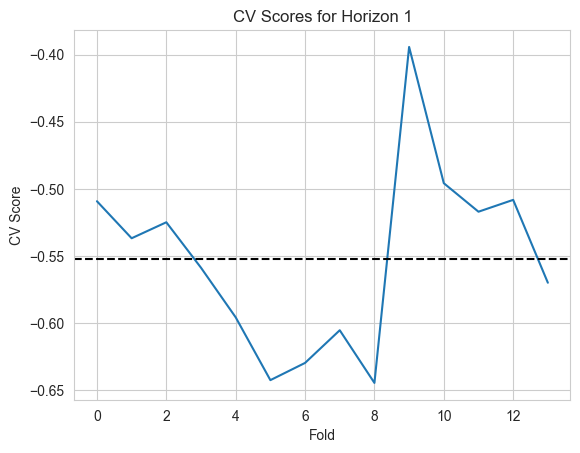

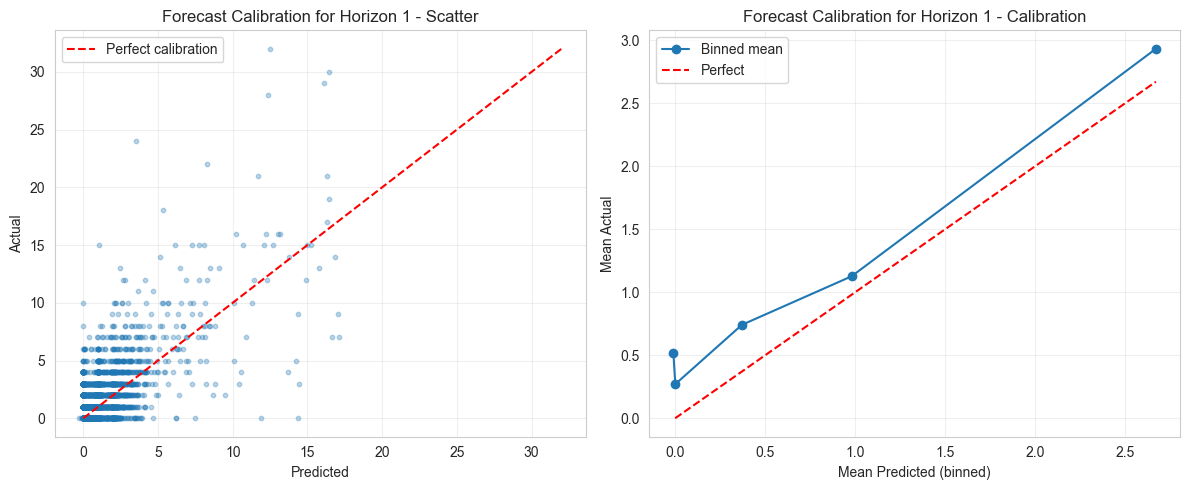

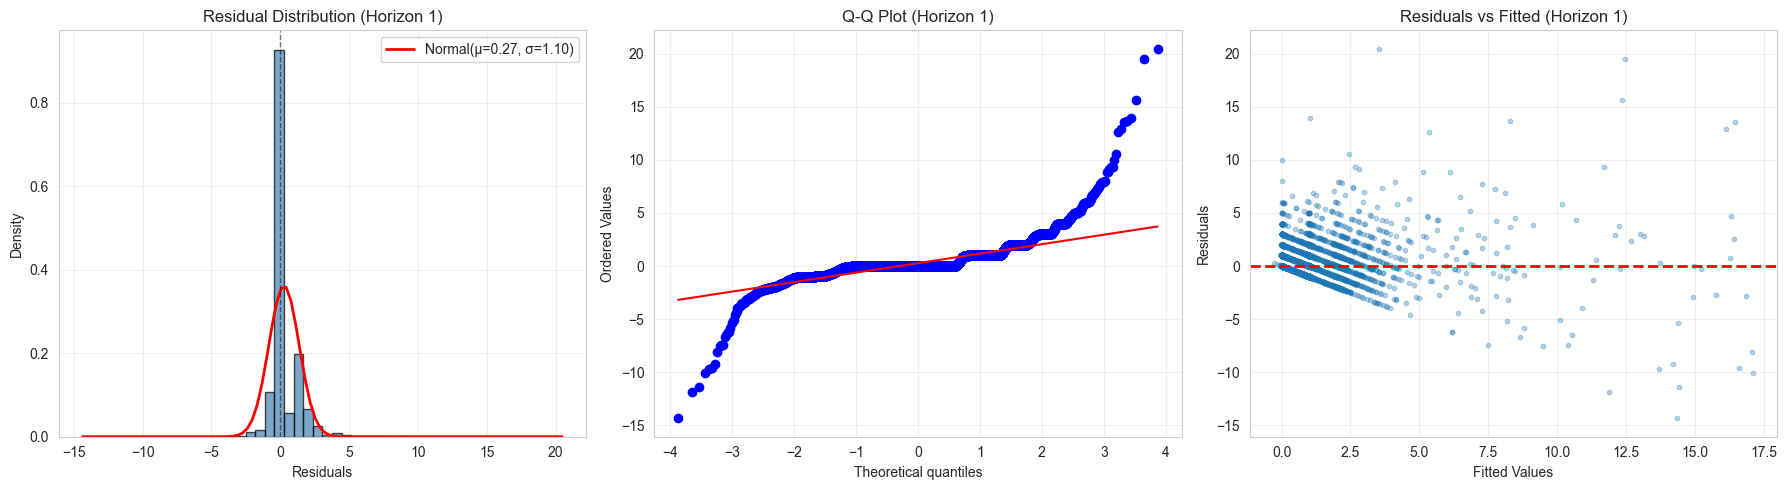


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: 0.2693
  Std Dev: 1.1042
  Median: 0.0000
  Skewness: 2.4974
  Kurtosis: 41.9438

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.6428
  P-value: 4.7939e-73
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 1386.3720
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.1112023188762663, 'mae': 0.552405090091418, 'poisson_deviance': 8.105529151636821, 'n_samples': 412733}, 'test': {'horizon': 1, 'rmse': 1.1365102913482932, 'mae': 0.5242892321656928, 'poisson_deviance': 7.8461694243485, 'n_samples': 12597}}



In [11]:
reload(forecast)
forecast.evaluate_models(bundle_50)

### Evaluate 10th Percentile Models

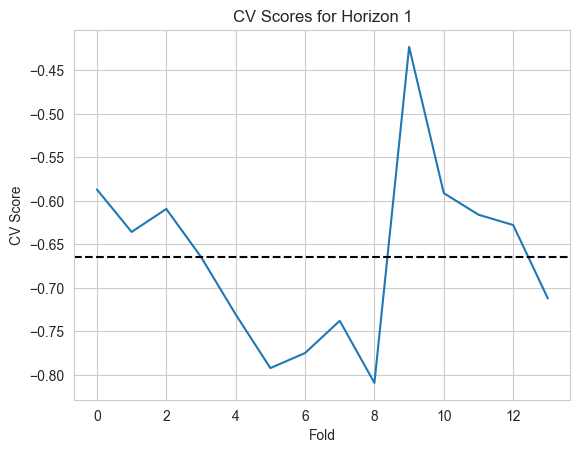

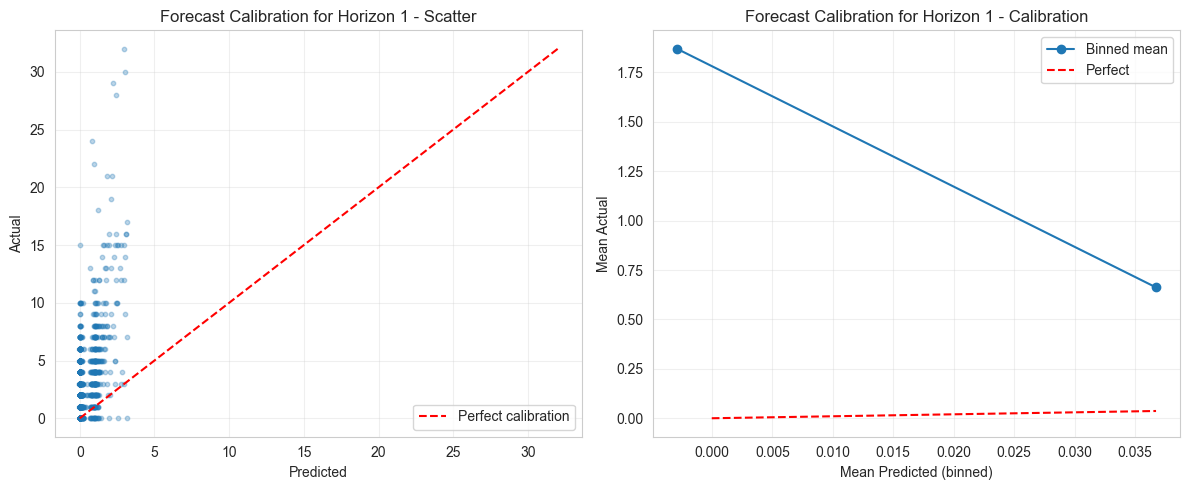

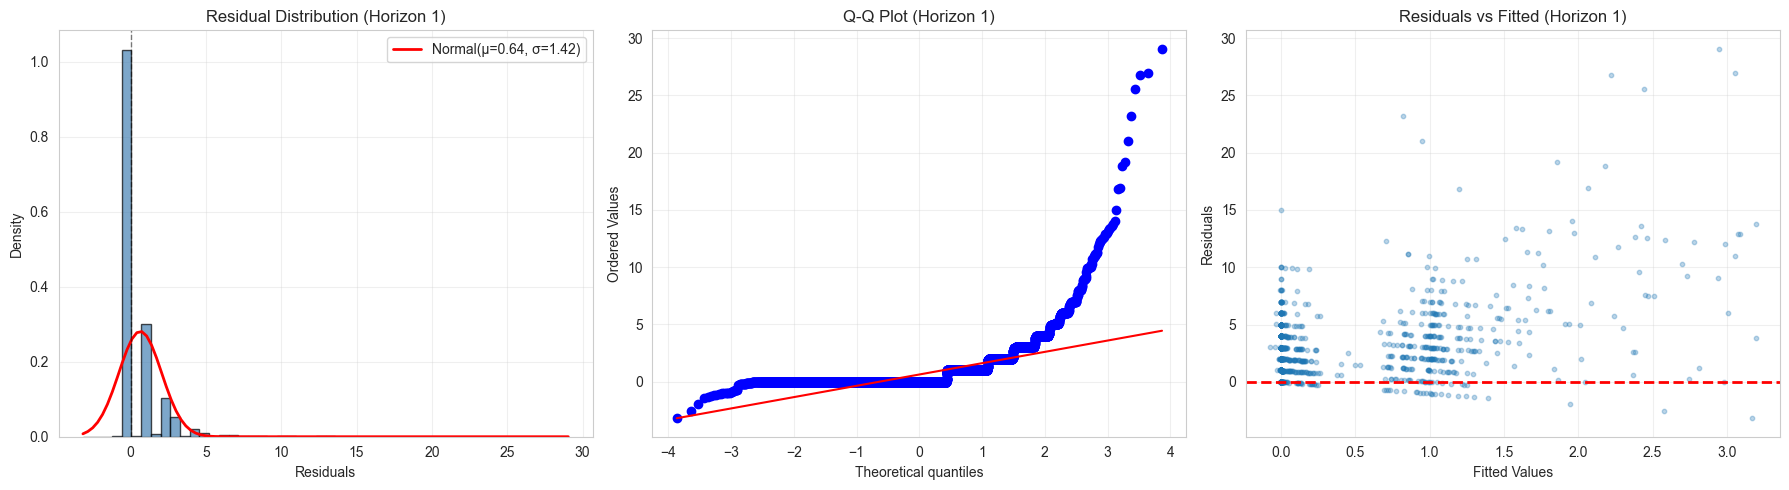


Horizon 1 - Residual Analysis
Residual Statistics:
  Mean: 0.6358
  Std Dev: 1.4193
  Median: 0.0000
  Skewness: 6.0127
  Kurtosis: 68.6828

Shapiro-Wilk Normality Test (n=5000):
  Statistic: 0.4798
  P-value: 5.2509e-81
  Interpretation: Residuals are NOT normally distributed (α=0.05)

Anderson-Darling Normality Test:
  Statistic: 1947.3776
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

------------------------------------------------------------
Model Performance Metrics:
{'train': {'horizon': 1, 'rmse': 1.4634468884984553, 'mae': 0.681447770630107, 'poisson_deviance': 23.61142376305878, 'n_samples': 412733}, 'test': {'horizon': 1, 'rmse': 1.555150202648079, 'mae': 0.6410579874655088, 'poisson_deviance': 20.57611965136301, 'n_samples': 12597}}



In [12]:
reload(forecast)
forecast.evaluate_models(bundle_10)